In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
from scipy import ndimage

In [3]:
geojson_path = "/Users/josemawyin/Library/Mobile Documents/com~apple~CloudDocs/Data Science Masters /698/Intro Work/lsoa.geojson"
world = gpd.read_file(geojson_path)
world=world.rename(columns = {'LSOA11CD':'LSOA_Code'})
world=world.sort_values('LSOA_Code')
###
#lsoa_centroid_path = "/Users/josemawyin/Library/Mobile Documents/com~apple~CloudDocs/Data Science Masters /698/Data/Output_Areas__December_2011__Population_Weighted_Centroids-shp/Output_Areas__December_2011__Population_Weighted_Centroids.shp"
lsoa_centroid_path = "/Users/josemawyin/Library/Mobile Documents/com~apple~CloudDocs/Data Science Masters /698/Data/LSOA_Dec_2011_Population_Weighted_Centroids-shp/Lower_Layer_Super_Output_Areas__December_2011__Population_Weighted_Centroids.shp"
lsoa_centroid = gpd.read_file(lsoa_centroid_path)
lsoa_centroid=lsoa_centroid.rename(columns = {'lsoa11cd':'LSOA_Code'})
lsoa_centroid=lsoa_centroid.rename(columns = {'lsoa11nm':'LSOA11NMW'})
lsoa_centroid=lsoa_centroid.sort_values('LSOA_Code')
lsoa_centroid=lsoa_centroid.drop(columns=['objectid'])
###
demand_2018_loc = "/Users/josemawyin/Library/Mobile Documents/com~apple~CloudDocs/Downloads/LSOA_DOM_ELEC_csv/LSOA_ELEC_2018.csv"
demand_2018 = pd.read_csv(demand_2018_loc)
demand_2018=demand_2018.rename(columns = {'LSOACode':'LSOA_Code'})
demand_2018=demand_2018.sort_values('LSOA_Code')
###
installations_loc = "/Users/josemawyin/Library/Mobile Documents/com~apple~CloudDocs/Data Science Masters /698/Intro Work/LSOA_installation.csv"
installations = pd.read_csv(installations_loc)

In [524]:
installations

,Extension (Y/N),PostCode,Technology,Installed capacity,Declared net capacity,Application date,Commissioning date,MCS issue date,Export status,TariffCode,...,Installation Type,Installation Country,Government Office Region,Local Authority,Constituency,Accreditation Route,MPAN Prefix,Community school category,LSOA_Code,MLSOA Code
0,N,TR11,Photovoltaic,2.88,2.88,2010-04-07 00:00:00,2010-03-24,NaN,Export (Deemed),PV-R/0-4/01,...,Domestic,England,South West,Cornwall,Truro and Falmouth,MCS,22.0,Not Community Or School,E01018840,E02003915
1,N,TA4,Photovoltaic,2.88,2.88,2010-04-07 00:00:00,2010-03-19,NaN,Export (Deemed),PV-R/0-4/01,...,Domestic,England,South West,Somerset West and Taunton,Taunton Deane,MCS,22.0,Not Community Or School,E01029320,E02006101
2,N,NW7,Photovoltaic,3.87,3.87,2010-04-07 00:00:00,2010-03-25,NaN,Export (Deemed),PV-R/0-4/01,...,Domestic,England,London,Barnet,Hendon,MCS,10.0,Not Community Or School,E01000255,E02000040
3,N,S20,Photovoltaic,3.33,3.33,2010-04-07 00:00:00,2010-04-07,NaN,Export (Deemed),PV-R/0-4/01,...,Domestic,England,Yorkshire and The Humber,Sheffield,Sheffield South East,MCS,11.0,Not Community Or School,E01008024,E02006803
4,N,BA22,Photovoltaic,1.98,1.98,2010-04-07 00:00:00,2009-07-29,NaN,Export (Standard Tariff),PV-R/0-4/01,...,Domestic,England,South West,South Somerset,Yeovil,MCS,22.0,Not Community Or School,E01029214,E02006091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858042,N,DE21,Photovoltaic,3.15,3.00,2019-11-08 00:00:00,2018-06-16,NaN,Export (Deemed),PV-R/0-4/09H-1,...,Domestic,England,East Midlands,Derby,Derby North,MCS,11.0,Not Community Or School,E01013536,E02002802
858043,N,AB21,Photovoltaic,1.08,1.08,2019-11-17 00:00:00,2017-08-11,NaN,Export (Deemed),PV-N/0-4/08H-3,...,Domestic,Scotland,Scotland,Aberdeen City,Gordon,MCS,17.0,Not Community Or School,S01006743,S02001277
858044,N,SA37,Photovoltaic,2.24,2.00,2019-12-14 00:00:00,2017-12-14,NaN,Export (Deemed),PV-N/0-4/08H-3,...,Domestic,Wales,Wales,Pembrokeshire,Preseli Pembrokeshire,MCS,21.0,Not Community Or School,W01000559,W02000126
858045,N,LL71,Photovoltaic,3.92,3.92,2019-12-15 00:00:00,2018-11-15,NaN,Export (Deemed),PV-R/0-4/09H-3,...,Domestic,Wales,Wales,Isle of Anglesey,Ynys Môn,MCS,13.0,Not Community Or School,W01000021,W02000002


In [264]:
lsoa_centroid

,LSOA_Code,LSOA11NMW,geometry
22841,E01000001,City of London 001A,POINT (-0.09628 51.51964)
22836,E01000002,City of London 001B,POINT (-0.09241 51.51964)
22838,E01000003,City of London 001C,POINT (-0.09596 51.52209)
22834,E01000005,City of London 001E,POINT (-0.07384 51.51303)
22829,E01000006,Barking and Dagenham 016A,POINT (0.08809 51.53919)
...,...,...,...
34102,W01001954,Cardiff 006F,POINT (-3.25478 51.51628)
34103,W01001955,Swansea 025F,POINT (-3.94285 51.62354)
34100,W01001956,Swansea 023E,POINT (-4.01160 51.62276)
34101,W01001957,Swansea 025G,POINT (-3.94848 51.61549)


In [247]:
lsoa_centroid["LSOA_Code"].nunique()

181408

In [298]:
world

,LSOA11CD,LSOA11NM,LSOA11NMW,geometry
0,E01000001,City of London 001A,City of London 001A,"POLYGON ((-0.09729 51.52158, -0.09652 51.52027..."
1,E01000002,City of London 001B,City of London 001B,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752..."
2,E01000003,City of London 001C,City of London 001C,"POLYGON ((-0.09679 51.52325, -0.09647 51.52282..."
3,E01000005,City of London 001E,City of London 001E,"POLYGON ((-0.07323 51.51000, -0.07553 51.50974..."
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ..."
...,...,...,...,...
34748,W01001954,Cardiff 006F,Caerdydd 006F,"POLYGON ((-3.25545 51.52101, -3.25488 51.51968..."
34749,W01001955,Swansea 025F,Abertawe 025F,"POLYGON ((-3.94052 51.63059, -3.93912 51.62701..."
34750,W01001956,Swansea 023E,Abertawe 023E,"POLYGON ((-4.02463 51.63614, -4.02456 51.63573..."
34751,W01001957,Swansea 025G,Abertawe 025G,"POLYGON ((-3.94918 51.61754, -3.94812 51.61669..."


In [248]:
world["LSOA11CD"].nunique()

34753

In [229]:
list(world.columns)

['LSOA11CD', 'LSOA11NM', 'LSOA11NMW', 'geometry']

In [130]:
world.shape

(34753, 4)

In [31]:
demand_2010.shape

(41730, 10)

In [74]:
demand_2010=demand_2010.rename(columns = {'LSOACode':'LSOA_Code'})
demand_2010

,LAName,LACode,MSOAName,MSOACode,LSOAName,LSOA_Code,METERS,KWH,MEAN,MEDIAN
0,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001A,E01011954,962,3.061224e+06,3182,2813
1,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001B,E01011969,638,2.184541e+06,3424,3051
2,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001C,E01011970,452,1.813380e+06,4012,3480
3,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001D,E01011971,530,2.076311e+06,3918,3672
4,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001F,E01033465,746,2.620862e+06,3513,3077
...,...,...,...,...,...,...,...,...,...,...
41725,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008C,W01001301,786,2.559067e+06,3256,2996
41726,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008D,W01001308,505,2.129738e+06,4217,3710
41727,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008E,W01001309,523,1.845027e+06,3528,3174
41728,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008F,W01001898,657,2.572098e+06,3915,3312


In [27]:
#Only England Demand
demand_2010_E = demand_2010[demand_2010.LSOACode.str.startswith('E')]
demand_2010_E.shape

AttributeError: 'DataFrame' object has no attribute 'LSOACode'

In [172]:
world.nunique()

LSOA_Code    34753
LSOA11NM     34753
LSOA11NMW    34753
geometry     34753
dtype: int64

In [18]:
demand_2010["LSOACode"].nunique()

41730

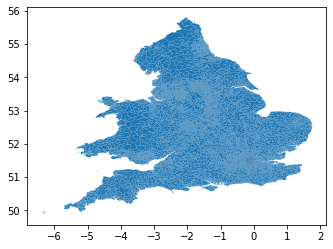

In [211]:
world.plot()

In [24]:
world.set_index("LSOA11CD", inplace = True) 

In [25]:
demand_2010.set_index("LSOACode", inplace = True) 

In [75]:
new_demand_2010 = demand_2010[demand_2010['LSOA_Code'].isin(world['LSOA_Code'])]
new_demand_2010.shape

(34753, 10)

In [76]:
new_demand_2010.sort_values('LSOA_Code')
new_demand_2010

,LAName,LACode,MSOAName,MSOACode,LSOAName,LSOA_Code,METERS,KWH,MEAN,MEDIAN
0,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001A,E01011954,962,3061223.70,3182,2813
1,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001B,E01011969,638,2184541.40,3424,3051
2,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001C,E01011970,452,1813380.30,4012,3480
3,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001D,E01011971,530,2076311.20,3918,3672
4,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001F,E01033465,746,2620861.50,3513,3077
...,...,...,...,...,...,...,...,...,...,...
41724,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008B,W01001300,700,2522482.60,3604,3326
41725,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008C,W01001301,786,2559066.80,3256,2996
41726,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008D,W01001308,505,2129738.20,4217,3710
41727,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008E,W01001309,523,1845026.75,3528,3174


In [155]:
new_demand_2010['KWH'].describe()

count    3.475300e+04
mean     2.914666e+06
std      8.818661e+05
min      1.039447e+05
25%      2.359169e+06
50%      2.698928e+06
75%      3.230048e+06
max      1.496584e+07
Name: KWH, dtype: float64

In [154]:
new_demand_2010['MEDIAN'].median()

3329.0

In [60]:
world['demand_2010'] = new_demand_2010['MEAN']
world

,LSOA11CD,LSOA11NM,LSOA11NMW,geometry,demand_2010
0,E01000001,City of London 001A,City of London 001A,"POLYGON ((-0.09729 51.52158, -0.09652 51.52027...",3182.0
1,E01000002,City of London 001B,City of London 001B,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752...",3424.0
2,E01000003,City of London 001C,City of London 001C,"POLYGON ((-0.09679 51.52325, -0.09647 51.52282...",4012.0
3,E01000005,City of London 001E,City of London 001E,"POLYGON ((-0.07323 51.51000, -0.07553 51.50974...",3918.0
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ...",3513.0
...,...,...,...,...,...
34748,W01001954,Cardiff 006F,Caerdydd 006F,"POLYGON ((-3.25545 51.52101, -3.25488 51.51968...",NaN
34749,W01001955,Swansea 025F,Abertawe 025F,"POLYGON ((-3.94052 51.63059, -3.93912 51.62701...",NaN
34750,W01001956,Swansea 023E,Abertawe 023E,"POLYGON ((-4.02463 51.63614, -4.02456 51.63573...",NaN
34751,W01001957,Swansea 025G,Abertawe 025G,"POLYGON ((-3.94918 51.61754, -3.94812 51.61669...",NaN


In [531]:
installations=installations.rename(columns = {'LLSOA Code':'LSOA_Code'})
installations=installations.sort_values('LSOA_Code')
installations_is_pv =  installations['Technology']=="Photovoltaic"
installations_pv = installations[installations_is_pv]
installations_pv = installations_pv[installations_pv['Tariff Description'].str.contains("<=4kW")]
installations_pv

,Extension (Y/N),PostCode,Technology,Installed capacity,Declared net capacity,Application date,Commissioning date,MCS issue date,Export status,TariffCode,...,Installation Type,Installation Country,Government Office Region,Local Authority,Constituency,Accreditation Route,MPAN Prefix,Community school category,LSOA_Code,MLSOA Code
710909,N,EC2Y,Photovoltaic,2.520,2.50,2016-01-14 00:00:00,2016-01-12,NaN,Export (Deemed),PV-R/0-4/06M-3,...,Domestic,England,London,City of London,Cities of London and Westminster,MCS,16.0,Not Community Or School,E01000002,E02000001
677499,N,EC2Y,Photovoltaic,1.960,1.96,2015-10-30 00:00:00,2015-10-08,NaN,Export (Deemed),PV-R/0-4/06M-2,...,Domestic,England,London,City of London,Cities of London and Westminster,MCS,16.0,Not Community Or School,E01000002,E02000001
688838,N,EC2Y,Photovoltaic,2.030,2.03,2015-11-26 00:00:00,2015-11-26,NaN,Export (Deemed),PV-R/0-4/06M-2,...,Domestic,England,London,City of London,Cities of London and Westminster,MCS,16.0,Not Community Or School,E01000002,E02000001
731312,N,EC2Y,Photovoltaic,3.120,2.80,2015-12-30 00:00:00,2015-12-10,NaN,Export (Deemed),PV-R/0-4/06M-2,...,Domestic,England,London,City of London,Cities of London and Westminster,MCS,10.0,Not Community Or School,E01000002,E02000001
724280,N,EC2Y,Photovoltaic,3.135,2.80,2016-01-14 00:00:00,2016-01-13,NaN,Export (Deemed),PV-R/0-4/06M-3,...,Domestic,England,London,City of London,Cities of London and Westminster,MCS,10.0,Not Community Or School,E01000002,E02000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265225,N,SA2,Photovoltaic,3.920,3.92,2012-02-13 00:00:00,2012-02-07,NaN,Export (Deemed),PV-R/0-4/02,...,Domestic,Wales,Wales,Swansea,Swansea West,MCS,21.0,Not Community Or School,W01001956,W02000190
513795,N,SA2,Photovoltaic,3.840,3.84,2014-08-19 00:00:00,2014-07-24,NaN,Export (Deemed),PV-R/0-4/05H-1,...,Domestic,Wales,Wales,Swansea,Swansea West,MCS,21.0,Not Community Or School,W01001956,W02000190
389221,N,SA2,Photovoltaic,3.320,3.32,2013-05-31 00:00:00,2013-05-27,NaN,Export (Deemed),PV-R/0-4/04H-1,...,Domestic,Wales,Wales,Swansea,Swansea West,MCS,21.0,Not Community Or School,W01001956,W02000190
204732,N,SA1,Photovoltaic,1.880,1.88,2011-12-09 00:00:00,2011-11-23,NaN,Export (Deemed),PV-R/0-4/02,...,Domestic,Wales,Wales,Swansea,Swansea West,MCS,21.0,Not Community Or School,W01001957,W02000192


In [188]:
list(installations_pv.columns)

['Extension (Y/N)',
 'PostCode',
 'Technology',
 'Installed capacity',
 'Declared net capacity',
 'Application date',
 'Commissioning date',
 'MCS issue date',
 'Export status',
 'TariffCode',
 'Tariff Description',
 'Installation Type',
 'Installation Country',
 'Government Office Region',
 'Local Authority',
 'Constituency',
 'Accreditation Route',
 'MPAN Prefix',
 'Community school category',
 'LSOA_Code',
 'MLSOA Code']

In [191]:
installations_pv["Technology"].nunique()

1

In [196]:
installations_pv_agg = installations_pv.groupby(['LSOA_Code'])['Installed capacity'].count()
installations_pv_agg = pd.DataFrame(data=installations_pv_agg)
installations_pv_agg

,Installed capacity
LSOA_Code,
E01000002,8
E01000006,5
E01000008,1
E01000011,1
E01000012,2
...,...
W01001953,9
W01001954,18
W01001956,13


In [232]:
installations_pv_agg['Installed capacity'].describe()

count    39565.000000
mean        19.929635
std         21.237081
min          1.000000
25%          6.000000
50%         14.000000
75%         26.000000
max        394.000000
Name: Installed capacity, dtype: float64

In [233]:
installations_pv_agg['Installed capacity'].median()

14.0

In [231]:
installations_pv_agg['Installed capacity'].sum()

788516

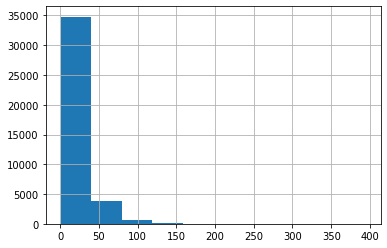

In [204]:
#np.log10(installations_pv_agg['Installed capacity']).hist()
installations_pv_agg['Installed capacity'].hist()

In [173]:
test = installations_pv_agg.join(world.set_index('LSOA_Code'))
test

,Installed capacity,LSOA11NM,LSOA11NMW,geometry
LSOA_Code,,,,
E01000002,22.69,City of London 001B,City of London 001B,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752..."
E01000003,21.00,City of London 001C,City of London 001C,"POLYGON ((-0.09679 51.52325, -0.09647 51.52282..."
E01000005,24.65,City of London 001E,City of London 001E,"POLYGON ((-0.07323 51.51000, -0.07553 51.50974..."
E01000006,11.63,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ..."
E01000008,102.59,Barking and Dagenham 015B,Barking and Dagenham 015B,"MULTIPOLYGON (((0.07135 51.54169, 0.07229 51.5..."
...,...,...,...,...
W01001954,66.45,Cardiff 006F,Caerdydd 006F,"POLYGON ((-3.25545 51.52101, -3.25488 51.51968..."
W01001955,29.90,Swansea 025F,Abertawe 025F,"POLYGON ((-3.94052 51.63059, -3.93912 51.62701..."
W01001956,53.99,Swansea 023E,Abertawe 023E,"POLYGON ((-4.02463 51.63614, -4.02456 51.63573..."


In [323]:
world

,LSOA_Code,LSOA11NM,LSOA11NMW,geometry
0,E01000001,City of London 001A,City of London 001A,"POLYGON ((-0.09729 51.52158, -0.09652 51.52027..."
1,E01000002,City of London 001B,City of London 001B,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752..."
2,E01000003,City of London 001C,City of London 001C,"POLYGON ((-0.09679 51.52325, -0.09647 51.52282..."
3,E01000005,City of London 001E,City of London 001E,"POLYGON ((-0.07323 51.51000, -0.07553 51.50974..."
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ..."
...,...,...,...,...
34748,W01001954,Cardiff 006F,Caerdydd 006F,"POLYGON ((-3.25545 51.52101, -3.25488 51.51968..."
34749,W01001955,Swansea 025F,Abertawe 025F,"POLYGON ((-3.94052 51.63059, -3.93912 51.62701..."
34750,W01001956,Swansea 023E,Abertawe 023E,"POLYGON ((-4.02463 51.63614, -4.02456 51.63573..."
34751,W01001957,Swansea 025G,Abertawe 025G,"POLYGON ((-3.94918 51.61754, -3.94812 51.61669..."


In [325]:
test2 = pd.DataFrame()
test2 = pd.merge(installations_pv_agg, world, how='right', on='LSOA_Code')
test2['Installed capacity'] = test2['Installed capacity'].fillna(0)

test2


,LSOA_Code,Installed capacity,LSOA11NM,LSOA11NMW,geometry
0,E01000002,8.0,City of London 001B,City of London 001B,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752..."
1,E01000006,5.0,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ..."
2,E01000008,1.0,Barking and Dagenham 015B,Barking and Dagenham 015B,"MULTIPOLYGON (((0.07135 51.54169, 0.07229 51.5..."
3,E01000011,1.0,Barking and Dagenham 016C,Barking and Dagenham 016C,"POLYGON ((0.08272 51.54350, 0.08475 51.54249, ..."
4,E01000012,2.0,Barking and Dagenham 015D,Barking and Dagenham 015D,"POLYGON ((0.07864 51.54357, 0.07864 51.54328, ..."
...,...,...,...,...,...
34748,W01001943,0.0,Cardiff 048B,Caerdydd 048B,"POLYGON ((-3.16549 51.47186, -3.16499 51.47121..."
34749,W01001945,0.0,Cardiff 048D,Caerdydd 048D,"POLYGON ((-3.17892 51.45107, -3.17731 51.44971..."
34750,W01001950,0.0,Cardiff 049D,Caerdydd 049D,"POLYGON ((-3.17091 51.46776, -3.17016 51.46688..."
34751,W01001951,0.0,Cardiff 049E,Caerdydd 049E,"POLYGON ((-3.16151 51.47686, -3.15972 51.47458..."


In [331]:
test3 = pd.merge(demand_2018, test2, how='right', on='LSOA_Code')
test3['Install_%'] = 100 * test2['Installed capacity']/test3['METERS']
test3
test3['Install_%'].describe()

count    34753.000000
mean         3.002703
std          3.246274
min          0.000000
25%          0.907716
50%          2.058824
75%          3.947368
max         49.090909
Name: Install_%, dtype: float64

In [215]:
test2['Installed capacity'].std()

21.866066244665884

In [216]:
list(test2.columns)

['LSOA_Code', 'Installed capacity', 'LSOA11NM', 'LSOA11NMW', 'geometry']

In [226]:
test2

,LSOA_Code,Installed capacity,LSOA11NM,LSOA11NMW,geometry
0,E01000002,8.0,City of London 001B,City of London 001B,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752..."
1,E01000006,5.0,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ..."
2,E01000008,1.0,Barking and Dagenham 015B,Barking and Dagenham 015B,"MULTIPOLYGON (((0.07135 51.54169, 0.07229 51.5..."
3,E01000011,1.0,Barking and Dagenham 016C,Barking and Dagenham 016C,"POLYGON ((0.08272 51.54350, 0.08475 51.54249, ..."
4,E01000012,2.0,Barking and Dagenham 015D,Barking and Dagenham 015D,"POLYGON ((0.07864 51.54357, 0.07864 51.54328, ..."
...,...,...,...,...,...
34748,W01001943,NaN,Cardiff 048B,Caerdydd 048B,"POLYGON ((-3.16549 51.47186, -3.16499 51.47121..."
34749,W01001945,NaN,Cardiff 048D,Caerdydd 048D,"POLYGON ((-3.17892 51.45107, -3.17731 51.44971..."
34750,W01001950,NaN,Cardiff 049D,Caerdydd 049D,"POLYGON ((-3.17091 51.46776, -3.17016 51.46688..."
34751,W01001951,NaN,Cardiff 049E,Caerdydd 049E,"POLYGON ((-3.16151 51.47686, -3.15972 51.47458..."


In [306]:
world['Installed capacity'] = test2['Installed capacity']
world['Installed capacity'] = world['Installed capacity'] + 0.01
world['Installed capacity'] = np.log(world['Installed capacity'])
world

,LSOA11CD,LSOA11NM,LSOA11NMW,geometry,Installed capacity
0,E01000001,City of London 001A,City of London 001A,"POLYGON ((-0.09729 51.52158, -0.09652 51.52027...",2.080691
1,E01000002,City of London 001B,City of London 001B,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752...",1.611436
2,E01000003,City of London 001C,City of London 001C,"POLYGON ((-0.09679 51.52325, -0.09647 51.52282...",0.009950
3,E01000005,City of London 001E,City of London 001E,"POLYGON ((-0.07323 51.51000, -0.07553 51.50974...",0.009950
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ...",0.698135
...,...,...,...,...,...
34748,W01001954,Cardiff 006F,Caerdydd 006F,"POLYGON ((-3.25545 51.52101, -3.25488 51.51968...",NaN
34749,W01001955,Swansea 025F,Abertawe 025F,"POLYGON ((-3.94052 51.63059, -3.93912 51.62701...",NaN
34750,W01001956,Swansea 023E,Abertawe 023E,"POLYGON ((-4.02463 51.63614, -4.02456 51.63573...",NaN
34751,W01001957,Swansea 025G,Abertawe 025G,"POLYGON ((-3.94918 51.61754, -3.94812 51.61669...",NaN


/Users/josemawyin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


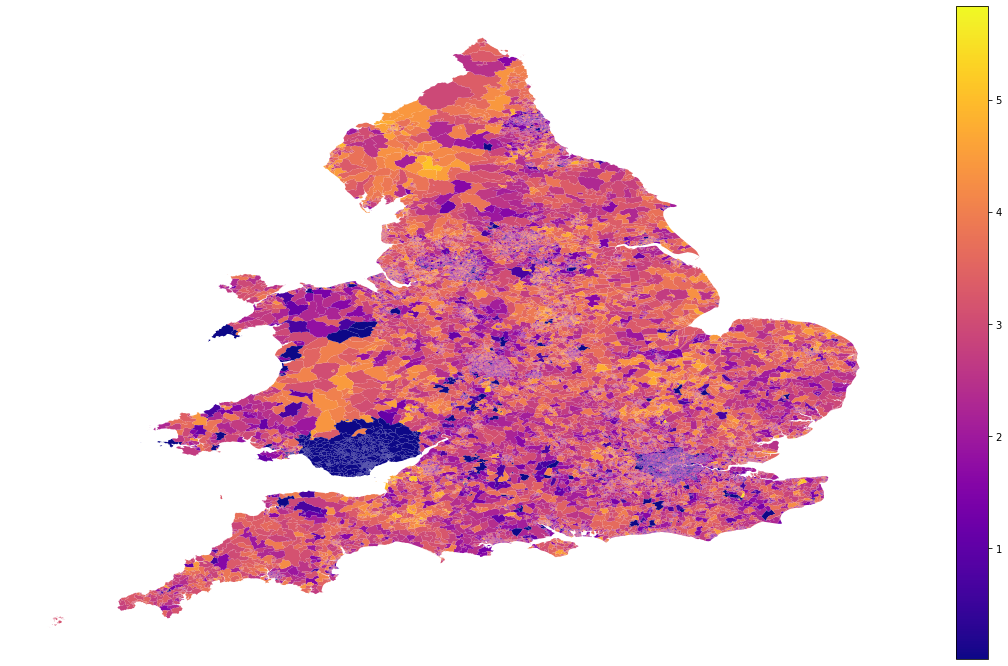

In [307]:
fig, ax = plt.subplots(1, figsize=(20, 12))
world.plot(column='Installed capacity', ax=ax, cmap='plasma')
ax.axis('off')
#ax.set_yscale('log')
vmin = world['Installed capacity'].min()
#vmax = 2*test2['Installed capacity'].std()
vmax = world['Installed capacity'].max()

# Create colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

/Users/josemawyin/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:418: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/josemawyin/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:418: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k


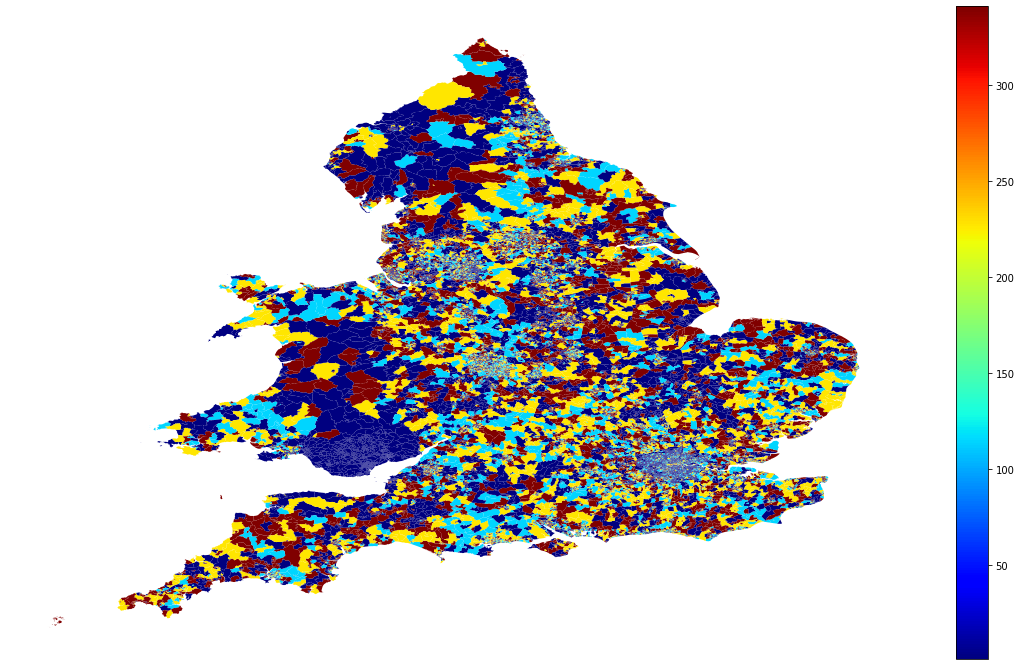

In [14]:
## Mapping all of the UK

my_world = world
#Making column labels the same
#my_world.sort_values('LSOA11CD')
#my_world=my_world.rename(columns = {'LSOA11CD':'LSOA_Code'})


#Filtering Installations to be only "Photovoltaic" and "<=4kW"
installations=installations.rename(columns = {'LLSOA Code':'LSOA_Code'})
installations_is_pv =  installations['Technology']=="Photovoltaic"
installations_pv = installations[installations_is_pv]
installations_pv = installations_pv[installations_pv['Tariff Description'].str.contains("<=4kW")]

#Groupping All Installations in One LSOA
installations_pv_agg = installations_pv.groupby(['LSOA_Code'])['Installed capacity'].count()
installations_pv_agg = pd.DataFrame(data=installations_pv_agg)
installations_pv_agg

#Merging Data Frames
Merge_DF = pd.DataFrame()
cols_to_use = installations_pv_agg.columns.difference(my_world.columns)
Merge_DF = pd.merge(my_world, installations_pv_agg[cols_to_use], left_index=True, right_index=True, how='outer')
#Merge_DF = pd.merge(installations_pv_agg, my_world, how='outer', on='LSOA_Code')
Merge_DF_2 = pd.merge(demand_2018, Merge_DF, how='right', on='LSOA_Code')
Merge_DF_2['Installed capacity'] = Merge_DF_2['Installed capacity'].fillna(0)

my_world['Installed capacity'] = Merge_DF['Installed capacity']
my_world['Installed capacity'] = my_world['Installed capacity'] + 0.01
#my_world['Installed capacity'] = np.log(my_world['Installed capacity'])
#Creating Plot
fig, ax = plt.subplots(1, figsize=(20, 12))
my_world.plot(column='Installed capacity', ax=ax, cmap='jet', scheme='quantiles')
ax.axis('off')
#ax.set_yscale('log')
vmin = my_world['Installed capacity'].min()
#vmax = 2*test2['Installed capacity'].std()
vmax = my_world['Installed capacity'].max()

# Create colorbar
sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

del [Merge_DF,Merge_DF_2,my_world]
#del(Merge_DF)
#del(Merge_DF_2)

gc.collect()
Merge_DF=pd.DataFrame()
Merge_DF_2=pd.DataFrame()
my_world=pd.DataFrame()

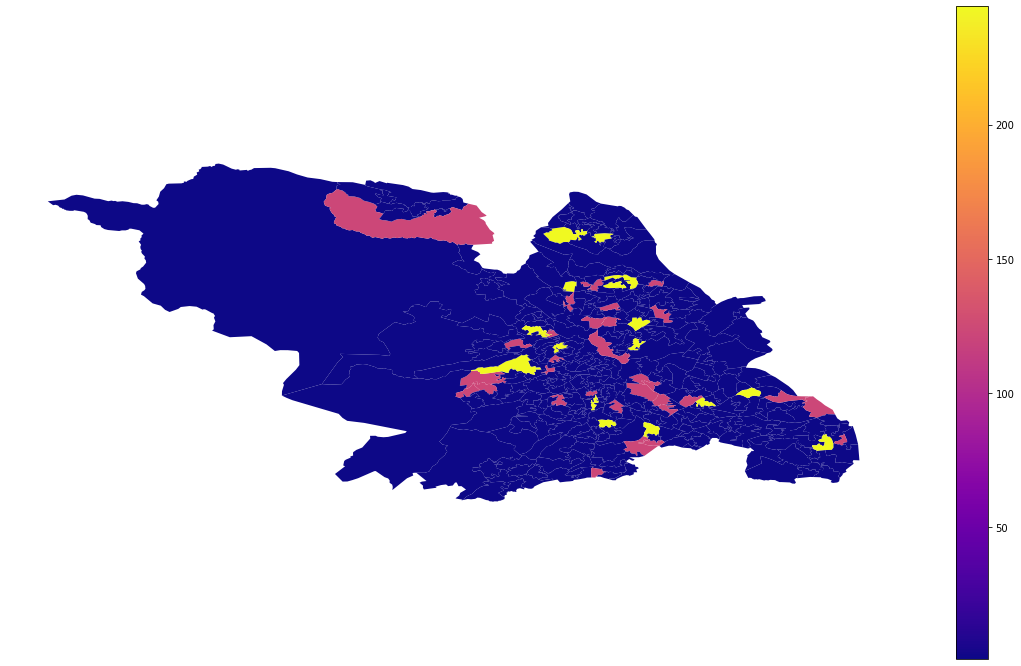

In [13]:
## Mapping only a Region
my_world = world
#Making column labels the same
#my_world.sort_values('LSOA11CD')
#my_world=my_world.rename(columns = {'LSOA11CD':'LSOA_Code'})

#Filtering Installations to be only "Photovoltaic" and "<=4kW"
installations=installations.rename(columns = {'LLSOA Code':'LSOA_Code'})
installations_is_pv =  installations['Technology']=="Photovoltaic"
installations_pv = installations[installations_is_pv]
installations_pv = installations_pv[installations_pv['Tariff Description'].str.contains("<=4kW")]

#Groupping All Installations in One LSOA
installations_pv_agg = installations_pv.groupby(['LSOA_Code'])['Installed capacity'].count()
installations_pv_agg = pd.DataFrame(data=installations_pv_agg)
installations_pv_agg

#Merging Data Frames
Merge_DF = pd.merge(installations_pv_agg, my_world, how='right', on='LSOA_Code')
#Merge_DF['Installed capacity'] = Merge_DF['Installed capacity'].fillna(0)


my_world['Installed capacity'] = Merge_DF['Installed capacity']
my_world['Installed capacity'] = my_world['Installed capacity'] + 0.01
#my_world['Installed capacity'] = np.log(my_world['Installed capacity'])

#Filtering to only a region
my_world = my_world[my_world['LSOA11NMW'].str.contains("Sheffield")]

#Creating Plot
fig, ax = plt.subplots(1, figsize=(20, 12))
my_world.plot(column='Installed capacity', ax=ax, cmap='plasma', scheme = 'std_mean')
#my_world.kdeplot(column='Installed capacity',cmap = 'Reds',ax=ax)
ax.axis('off')
#ax.set_yscale('log')
vmin = my_world['Installed capacity'].min()
#vmax = 2*test2['Installed capacity'].std()
vmax = my_world['Installed capacity'].max()

# Create colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

/Users/josemawyin/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


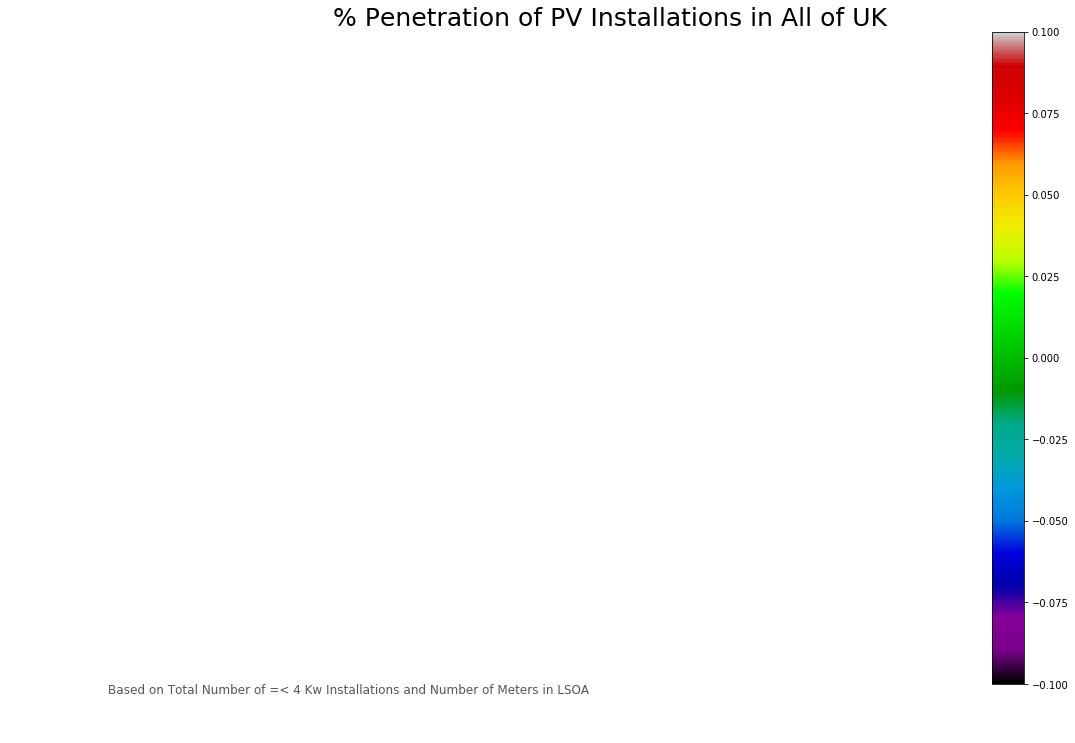

In [15]:
gc.collect()
## Mapping only a Region with %PV Penetration
my_world = pd.DataFrame()
my_world = world
#Making column labels the same
my_world.sort_values('LSOA_Code')
#my_world=my_world.rename(columns = {'LSOA11CD':'LSOA_Code'})

#Filtering Installations to be only "Photovoltaic" and "<=4kW"
installations=installations.rename(columns = {'LLSOA Code':'LSOA_Code'})
installations_is_pv =  installations['Technology']=="Photovoltaic"
installations_pv = installations[installations_is_pv]
installations_pv = installations_pv[installations_pv['Tariff Description'].str.contains("<=4kW")]

#Groupping All Installations in One LSOA
installations_pv_agg = installations_pv.groupby(['LSOA_Code'])['Installed capacity'].count()
installations_pv_agg = pd.DataFrame(data=installations_pv_agg)
installations_pv_agg

#Merging Data Frames
Merge_DF = pd.DataFrame()
cols_to_use = installations_pv_agg.columns.difference(my_world.columns)
Merge_DF = pd.merge(my_world, installations_pv_agg[cols_to_use], left_index=True, right_index=True, how='outer')
#Merge_DF = pd.merge(installations_pv_agg, my_world, how='outer', on='LSOA_Code')
Merge_DF_2 = pd.merge(demand_2018, Merge_DF, how='right', on='LSOA_Code')
Merge_DF_2['Installed capacity'] = Merge_DF_2['Installed capacity'].fillna(0)


Merge_DF_2['Install_%'] = 100 * Merge_DF['Installed capacity']/Merge_DF_2['METERS']
Merge_DF_2['Install_%'] = Merge_DF_2['Install_%'].fillna(0)



my_world['Install_%'] = Merge_DF_2['Install_%']
#my_world['Install_%'] = my_world['Installed capacity'] + 0.01
#my_world['Installed capacity'] = np.log(my_world['Installed capacity'])
city_name = 'All of UK'
#Filtering to only a region
my_world = my_world[my_world['LSOA11NMW'].str.contains(city_name)]

colormap = "nipy_spectral"
#Creating Plot
fig, ax = plt.subplots(1, figsize=(20, 12))
#my_world.plot(column='Install_%', ax=ax, cmap=colormap)
my_world.plot(column='Install_%', ax=ax,scheme='Fisher_Jenks', k=9, cmap=colormap, linewidth=0, edgecolor='0.8')
#my_world.plot(column='Install_%', ax=ax,scheme='percentiles', cmap=colormap, linewidth=0, edgecolor='0.8')
#my_world.kdeplot(column='Installed capacity',cmap = 'Reds',ax=ax)
ax.axis('off')
#ax.set_yscale('log')
vmin = my_world['Install_%'].min()
#vmax = 2*test2['Installed capacity'].std()
vmax = my_world['Install_%'].max()

# Create colorbar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
ax.set_title('% Penetration of PV Installations in {}'.format(city_name), fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Based on Total Number of =< 4 Kw Installations and Number of Meters in LSOA',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
fig.savefig('/Users/josemawyin/Library/Mobile Documents/com~apple~CloudDocs/Data Science Masters /698/Visuals/city_of_{}_PV_penetration.png'.format(city_name), dpi=300)

In [469]:
Merge_DF_2['Install_%'].describe

count    74318.000000
mean         1.404791
std          2.678606
min          0.000000
25%          0.000000
50%          0.000000
75%          1.869660
max         49.109091
Name: Install_%, dtype: float64

In [11]:
del [Merge_DF,Merge_DF_2,my_world]
#del(Merge_DF)
#del(Merge_DF_2)
gc.collect()
Merge_DF=pd.DataFrame()
Merge_DF_2=pd.DataFrame()
my_world=pd.DataFrame()

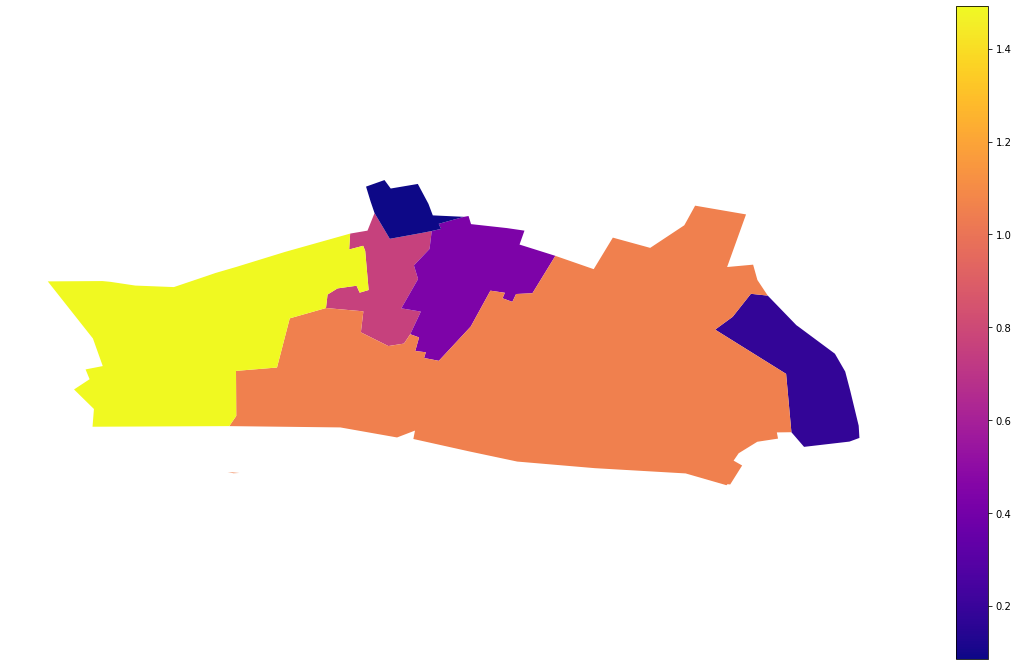

In [484]:



my_world['Install_%'] = Merge_DF_2['Install_%']
#my_world['Install_%'] = my_world['Installed capacity'] + 0.01
#my_world['Installed capacity'] = np.log(my_world['Installed capacity'])

#Filtering to only a region
my_world = my_world[my_world['LSOA11NMW'].str.contains("Manchester")]

#Creating Plot
fig, ax = plt.subplots(1, figsize=(20, 12))
my_world.plot(column='Install_%', ax=ax, cmap='plasma')
#my_world.kdeplot(column='Installed capacity',cmap = 'Reds',ax=ax)
ax.axis('off')
#ax.set_yscale('log')
vmin = my_world['Install_%'].min()
#vmax = 2*test2['Installed capacity'].std()
vmax = my_world['Install_%'].max()

# Create colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [366]:
list(Merge_DF.columns)

,LAName,LACode,MSOAName,MSOACode,LSOAName,LSOA_Code,METERS,KWH,MEAN,MEDIAN,Installed capacity,LSOA11NM,LSOA11NMW,geometry,Install_%
0,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1056,4397418.106,4164.221691,3535.25,NaN,City of London 001A,City of London 001A,"POLYGON ((-0.09729 51.52158, -0.09652 51.52027...",0.757576
1,City of London,E09000001,City of London 001,E02000001,City of London 001B,E01000002,1155,4391815.800,3802.437922,2996.40,8.0,City of London 001B,City of London 001B,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752...",0.432900
2,City of London,E09000001,City of London 001,E02000001,City of London 001C,E01000003,1182,3122919.400,2642.063790,1917.70,NaN,City of London 001C,City of London 001C,"POLYGON ((-0.09679 51.52325, -0.09647 51.52282...",0.084602
3,City of London,E09000001,City of London 001,E02000001,City of London 001E,E01000005,563,1642298.833,2917.049438,2071.70,NaN,City of London 001E,City of London 001E,"POLYGON ((-0.07323 51.51000, -0.07553 51.50974...",0.177620
4,Barking and Dagenham,E09000002,Barking and Dagenham 016,E02000017,Barking and Dagenham 016A,E01000006,529,2211867.367,4181.223756,3693.60,5.0,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ...",0.378072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34748,Cardiff,W06000015,Cardiff 006,W02000372,Cardiff 006F,W01001954,673,2683554.100,3987.450372,3471.00,18.0,Cardiff 006F,Caerdydd 006F,"POLYGON ((-3.25545 51.52101, -3.25488 51.51968...",0.000000
34749,Swansea,W06000011,Swansea 025,W02000192,Swansea 025F,W01001955,1382,3671856.500,2656.914978,1853.60,NaN,Swansea 025F,Abertawe 025F,"POLYGON ((-3.94052 51.63059, -3.93912 51.62701...",0.000000
34750,Swansea,W06000011,Swansea 023,W02000190,Swansea 023E,W01001956,866,2620889.100,3026.430831,2431.95,13.0,Swansea 023E,Abertawe 023E,"POLYGON ((-4.02463 51.63614, -4.02456 51.63573...",0.000000
34751,Swansea,W06000011,Swansea 025,W02000192,Swansea 025G,W01001957,501,1295671.500,2586.170659,1972.20,1.0,Swansea 025G,Abertawe 025G,"POLYGON ((-3.94918 51.61754, -3.94812 51.61669...",0.000000


In [362]:
list(Merge_DF_2.columns)

['LAName',
 'LACode',
 'MSOAName',
 'MSOACode',
 'LSOAName',
 'LSOA_Code',
 'METERS',
 'KWH',
 'MEAN',
 'MEDIAN',
 'Installed capacity',
 'LSOA11NM',
 'LSOA11NMW',
 'geometry',
 'Install_%']

In [351]:
Merge_DF

,LSOA_Code,Installed capacity_x,LSOA11NM,LSOA11NMW,geometry,Installed capacity_y
0,E01000002,8.0,City of London 001B,City of London 001B,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752...",8.01
1,E01000006,5.0,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ...",5.01
2,E01000008,1.0,Barking and Dagenham 015B,Barking and Dagenham 015B,"MULTIPOLYGON (((0.07135 51.54169, 0.07229 51.5...",1.01
3,E01000011,1.0,Barking and Dagenham 016C,Barking and Dagenham 016C,"POLYGON ((0.08272 51.54350, 0.08475 51.54249, ...",1.01
4,E01000012,2.0,Barking and Dagenham 015D,Barking and Dagenham 015D,"POLYGON ((0.07864 51.54357, 0.07864 51.54328, ...",2.01
...,...,...,...,...,...,...
34748,W01001943,NaN,Cardiff 048B,Caerdydd 048B,"POLYGON ((-3.16549 51.47186, -3.16499 51.47121...",NaN
34749,W01001945,NaN,Cardiff 048D,Caerdydd 048D,"POLYGON ((-3.17892 51.45107, -3.17731 51.44971...",NaN
34750,W01001950,NaN,Cardiff 049D,Caerdydd 049D,"POLYGON ((-3.17091 51.46776, -3.17016 51.46688...",NaN
34751,W01001951,NaN,Cardiff 049E,Caerdydd 049E,"POLYGON ((-3.16151 51.47686, -3.15972 51.47458...",NaN


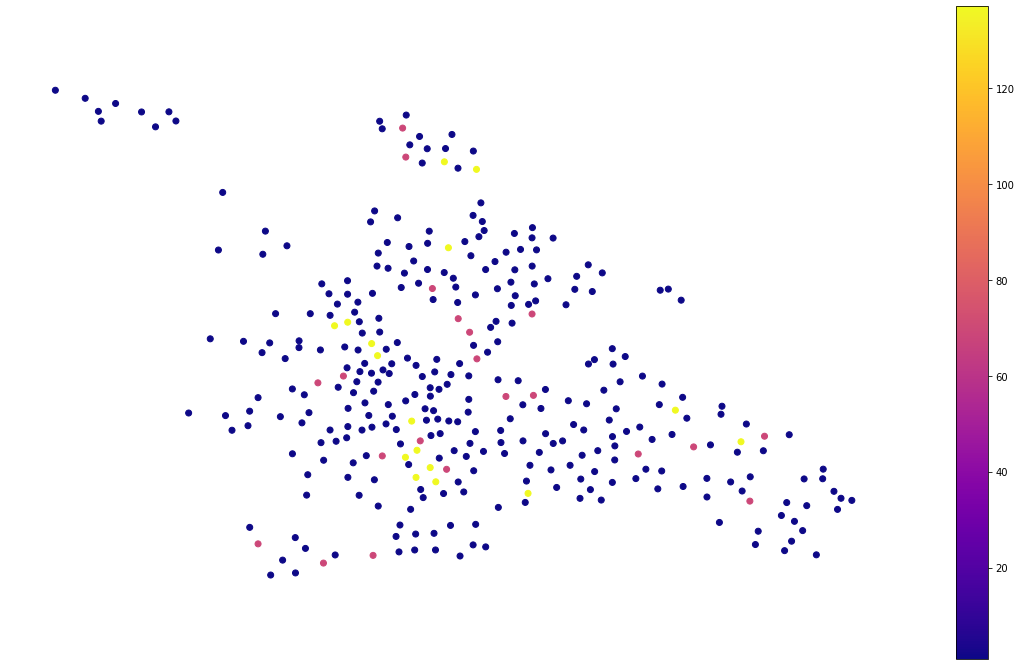

In [510]:
## Mapping only a Region with Centroids
my_world = lsoa_centroid
#Making column labels the same
my_world.sort_values('LSOA_Code')
my_world=my_world.rename(columns = {'LSOA11CD':'LSOA_Code'})

#Filtering Installations to be only "Photovoltaic" and "<=4kW"
installations=installations.rename(columns = {'LLSOA Code':'LSOA_Code'})
installations_is_pv =  installations['Technology']=="Photovoltaic"
installations_pv = installations[installations_is_pv]
installations_pv = installations_pv[installations_pv['Tariff Description'].str.contains("<=4kW")]

#Groupping All Installations in One LSOA
installations_pv_agg = installations_pv.groupby(['LSOA_Code'])['Installed capacity'].count()
installations_pv_agg = pd.DataFrame(data=installations_pv_agg)
installations_pv_agg

#Merging Data Frames
Merge_DF = pd.merge(installations_pv_agg, my_world, how='right', on='LSOA_Code')
#Merge_DF['Installed capacity'] = Merge_DF['Installed capacity'].fillna(0)


#my_world['Installed capacity'] = Merge_DF['Installed capacity']
my_world = pd.concat([my_world, Merge_DF['Installed capacity']], axis=1)
#my_world['Installed capacity'] = my_world['Installed capacity'] + 0.01
#my_world['Installed capacity'] = np.log(my_world['Installed capacity'])

#Filtering to only a region
my_world = my_world[my_world['LSOA11NMW'].str.contains("Sheffield")]

#Creating Plot
fig, ax = plt.subplots(1, figsize=(20, 12))
my_world.plot(column='Installed capacity', ax=ax, cmap='plasma', scheme = 'std_mean')
#my_world.kdeplot(column='Installed capacity',cmap = 'Reds',ax=ax)
ax.axis('off')
#ax.set_yscale('log')
vmin = my_world['Installed capacity'].min()
#vmax = 2*test2['Installed capacity'].std()
vmax = my_world['Installed capacity'].max()

# Create colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [511]:
my_world

,LSOA_Code,LSOA11NMW,geometry,Installed capacity
6154,E01008066,Sheffield 028B,POINT (-1.49726 53.38606),8.0
6155,E01008067,Sheffield 030D,POINT (-1.49505 53.38478),5.0
6156,E01008064,Sheffield 028A,POINT (-1.50544 53.38546),6.0
6157,E01008062,Sheffield 013E,POINT (-1.45050 53.42157),17.0
6158,E01008063,Sheffield 011B,POINT (-1.46085 53.42166),8.0
...,...,...,...,...
9382,E01007990,Sheffield 021A,POINT (-1.52305 53.40601),23.0
9413,E01008156,Sheffield 024E,POINT (-1.51082 53.39421),3.0
9449,E01008039,Sheffield 065F,POINT (-1.34695 53.33792),11.0
9459,E01008098,Sheffield 048A,POINT (-1.43355 53.36089),3.0


/Users/josemawyin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


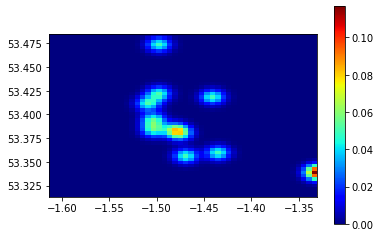

In [516]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()
heatmap(my_world, bins=50, smoothing=1.5)

In [539]:
J_installations_loc = "/Users/josemawyin/Library/Mobile Documents/com~apple~CloudDocs/Data Science Masters /698/Data/Jamie_PV_capacity_by_GSP_and_LLSOA/capacity_by_llsoa_and_gsp_20200617T165804/20200617T165804_capacity_by_llsoa_and_month.csv"
J_installations = pd.read_csv(J_installations_loc)
####Lower Layer Super Output Area (2011) to Clinical Commissioning Group to Local Authority District (April 2019) Lookup in England
lsoa_to_county_loc = "/Users/josemawyin/Library/Mobile Documents/com~apple~CloudDocs/Data Science Masters /698/Data/Lower_Layer_Super_Output_Area_(2011)_to_Clinical_Commissioning_Group_to_Local_Authority_District_(April_2019)_Lookup_in_England.csv"
lsoa_to_county = pd.read_csv(lsoa_to_county_loc)
lsoa_to_county=lsoa_to_county.rename(columns = {'LSOA11CD':'LSOA_Code'})
lsoa_to_county=lsoa_to_county.sort_values('LSOA_Code')
###Local Authority District to County (April 2019) Lookup in England
la_to_county_loc = "/Users/josemawyin/Library/Mobile Documents/com~apple~CloudDocs/Data Science Masters /698/Data/Local_Authority_District_to_County_(April_2019)_Lookup_in_England.csv"
la_to_county = pd.read_csv(la_to_county_loc)
la_to_county

,FID,LAD19CD,LAD19NM,CTY19CD,CTY19NM
0,1,E07000120,Hyndburn,E10000017,Lancashire
1,2,E07000121,Lancaster,E10000017,Lancashire
2,3,E07000122,Pendle,E10000017,Lancashire
3,4,E07000123,Preston,E10000017,Lancashire
4,5,E07000124,Ribble Valley,E10000017,Lancashire
...,...,...,...,...,...
256,257,E07000115,Tonbridge and Malling,E10000016,Kent
257,258,E07000116,Tunbridge Wells,E10000016,Kent
258,259,E07000117,Burnley,E10000017,Lancashire
259,260,E07000118,Chorley,E10000017,Lancashire


In [541]:
### Count unique values in column
la_to_county["CTY19NM"].nunique()
### List unique values in column
la_to_county.CTY19NM.unique()

array(['Lancashire', 'Leicestershire', 'Lincolnshire', 'Norfolk',
       'Northamptonshire', 'North Yorkshire', 'Nottinghamshire',
       'Oxfordshire', 'Inner London', 'Outer London',
       'Greater Manchester', 'Merseyside', 'South Yorkshire',
       'Tyne and Wear', 'Essex', 'West Midlands', 'Somerset',
       'Staffordshire', 'West Yorkshire', 'Buckinghamshire',
       'Cambridgeshire', 'Cumbria', 'Derbyshire', 'Devon', 'East Sussex',
       'Gloucestershire', 'Suffolk', 'Hampshire', 'Surrey',
       'Warwickshire', 'West Sussex', 'Worcestershire', 'Hertfordshire',
       'Kent'], dtype=object)

In [556]:
lsoa_to_county.LAD19NM.nunique()
lsoa_to_county

,FID,LSOA_Code,LSOA11NM,CCG19CD,CCG19CDH,CCG19NM,LAD19CD,LAD19NM
28104,28105,E01000001,City of London 001A,E38000035,07T,NHS City and Hackney CCG,E09000001,City of London
28110,28111,E01000002,City of London 001B,E38000035,07T,NHS City and Hackney CCG,E09000001,City of London
28119,28120,E01000003,City of London 001C,E38000035,07T,NHS City and Hackney CCG,E09000001,City of London
28126,28127,E01000005,City of London 001E,E38000035,07T,NHS City and Hackney CCG,E09000001,City of London
28144,28145,E01000006,Barking and Dagenham 016A,E38000004,07L,NHS Barking and Dagenham CCG,E09000002,Barking and Dagenham
...,...,...,...,...,...,...,...,...
22802,22803,E01033764,Liverpool 022E,E38000101,99A,NHS Liverpool CCG,E08000012,Liverpool
22806,22807,E01033765,Liverpool 061D,E38000101,99A,NHS Liverpool CCG,E08000012,Liverpool
22808,22809,E01033766,Liverpool 042G,E38000101,99A,NHS Liverpool CCG,E08000012,Liverpool
22810,22811,E01033767,Liverpool 050J,E38000101,99A,NHS Liverpool CCG,E08000012,Liverpool


Choosing Colormaps in Matplotlib
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

Lower Layer Super Output Area (2011) to Clinical Commissioning Group to Local Authority District (April 2019) Lookup in England
https://geoportal.statistics.gov.uk/datasets/lower-layer-super-output-area-2011-to-clinical-commissioning-group-to-local-authority-district-april-2019-lookup-in-england/data


Local Authority District to County (April 2019) Lookup in England
https://geoportal.statistics.gov.uk/datasets/local-authority-district-to-county-april-2019-lookup-in-england/data